In [15]:
def sigmoid(x):
    """
    Compute the sigmoid of x
    Arguments:
    x -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

In [1]:
import json
contents = open("/Users/surthi/Downloads/Archive (1)/mixed_features_gold_tagged_cleared_betterN/part-00000-e97dbd07-b5c8-4160-9c31-6430e44a03ac.json", "r").read() 
json_data = [json.loads(str(item)) for item in contents.strip().split('\n')]

In [2]:
from pandas.io.json import json_normalize
all_features_df = json_normalize(json_data)

In [3]:
print(all_features_df.columns.values)

df = all_features_df[['articleId', 'articleLengthN', 'countOfDistinctIndustryN', 'countOfOccurenceN', 'countOfOccurenceOfAliasesN', 
      'countOfOccurenceOfNamePreserveListN', 'countOfSignificantStringsN', 'countOfUrlMatchN', 
      'countryMatchByOverlapScore', 'directCityMatchScore', 'directCountryMatchScore', 'directStateMatchScore',
     'exactMatch', 'fieldMatch', 'isCommon', 'isIndustry', 'isProminent',
 'isProminentByItself', 'isProminentByParent',  'isSingleCompany', 'isTickerMatch', 
      'isUrlMatched', 'personScore', 'stateMatchByOverlapScore', 'sumOfIndustryN', 'w2vScoreN','isGold' ]]

# convert boolean features to 0's and 1's:
df[['isCommon', 'isIndustry', 'isProminent', 'fieldMatch',
 'isProminentByItself', 'isProminentByParent',  'isSingleCompany', 'isTickerMatch', 
      'isUrlMatched', 'isGold','exactMatch']] *= 1.0

['articleId' 'articleLength' 'articleLengthN' 'companyId'
 'countOfDistinctIndustry' 'countOfDistinctIndustryN' 'countOfOccurence'
 'countOfOccurenceN' 'countOfOccurenceOfAliases'
 'countOfOccurenceOfAliasesN' 'countOfOccurenceOfNamePreserveList'
 'countOfOccurenceOfNamePreserveListN' 'countOfSignificantStrings'
 'countOfSignificantStringsN' 'countOfUrlMatch' 'countOfUrlMatchN'
 'countryMatchByOverlapScore' 'directCityMatchScore'
 'directCountryMatchScore' 'directStateMatchScore' 'exactMatch'
 'fieldMatch' 'isCommon' 'isFortune' 'isGold' 'isIndustry' 'isProminent'
 'isProminentByItself' 'isProminentByParent' 'isPublic' 'isSingleCompany'
 'isTickerMatch' 'isUrlMatched' 'mentionMatched' 'personScore'
 'stateMatchByOverlapScore' 'sumOfIndustry' 'sumOfIndustryN' 'w2vScore'
 'w2vScoreN']


/Users/surthi/Documents/mygitrepo/cs230-code-examples/tensorflow/nlp/cs230/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [4]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] # size of input layer
    n_h = 20
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

In [5]:
import numpy as np
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [6]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [7]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y)
   
    cost = (-1/m)*np.sum(logprobs)
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [8]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2-Y
    dW2 = 1/m*(np.dot(dZ2, A1.T))
    db2 = 1/m*(np.sum(dZ2, axis=1,keepdims=True))
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = 1/m*(np.dot(dZ1, X.T))
    db1 = 1/m*(np.sum(dZ1, axis=1,keepdims=True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [9]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [10]:
import matplotlib.pyplot as plt
def nn_model(X, Y, n_h, num_iterations = 20000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    costs = [] 
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate = 0.1)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
    
     # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.show()
    
    return parameters

In [79]:
def predict(parameters, X, threshold = 0.5):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = np.where(A2 > threshold, 1, 0)  
    return predictions

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
articleIds_test = test.loc[:, test.columns == 'articleId'].T.values
Y_test = test.loc[:, test.columns == 'isGold'].T.values
X_test = test.drop(columns=['articleId', 'isGold']).T.values

articleIds_train = train.loc[:, train.columns == 'articleId'].T.values
Y_train = train.loc[:, train.columns == 'isGold'].T.values
X_train = train.drop(columns=['articleId', 'isGold']).T.values

#X_test = test.loc[:, test.columns != ['isGold'].T.values
#Y_test = test.loc[:, test.columns == 'isGold'].T.values
#X_train = train.loc[:, test.columns != 'isGold'].T.values
#Y_train = train.loc[:, test.columns == 'isGold'].T.values
#df.dtypes

Cost after iteration 0: 0.696337
Cost after iteration 1000: 0.358427
Cost after iteration 2000: 0.349955
Cost after iteration 3000: 0.349120
Cost after iteration 4000: 0.356764
Cost after iteration 5000: 0.344173
Cost after iteration 6000: 0.340412
Cost after iteration 7000: 0.338245
Cost after iteration 8000: 0.344388
Cost after iteration 9000: 0.341428
Cost after iteration 10000: 0.340420
Cost after iteration 11000: 0.337565
Cost after iteration 12000: 0.337551
Cost after iteration 13000: 0.337715
Cost after iteration 14000: 0.337623
Cost after iteration 15000: 0.335340
Cost after iteration 16000: 0.335336
Cost after iteration 17000: 0.335905
Cost after iteration 18000: 0.336316
Cost after iteration 19000: 0.336110
Cost after iteration 20000: 0.335568
Cost after iteration 21000: 0.334976
Cost after iteration 22000: 0.338339
Cost after iteration 23000: 0.336666
Cost after iteration 24000: 0.336495
Cost after iteration 25000: 0.372181
Cost after iteration 26000: 0.368779
Cost after ite

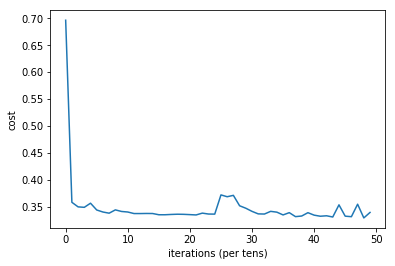

In [18]:
n_h = 2
parameters = nn_model(X_train, Y_train, n_h, num_iterations=50000, print_cost=True)

In [82]:
predictions = predict(parameters, X_train, 0.2)
accuracy = float((np.dot(Y_train,predictions.T) + np.dot(1-Y_train,1-predictions.T))/float(Y_train.size)*100)
print ("Train Accuracy for {} hidden units: {} %".format(n_h, accuracy))

predictions = predict(parameters, X_test, 0.5)
accuracy = float((np.dot(Y_test,predictions.T) + np.dot(1-Y_test,1-predictions.T))/float(Y_test.size)*100)
print ("Test Accuracy for {} hidden units: {} %".format(n_h, accuracy))

def myscores(cmat): 
    tp = cmat[0][0] 
    fp = cmat[0][1] 
    fn = cmat[1][0] 
    tn = cmat[1][1] 
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    return precision,recall,f1

from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(Y_test[0], predictions[0])
print(cmat)
print(myscores(cmat))

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
print(recall_score(Y_test[0], predictions[0]))
print(precision_score(Y_test[0], predictions[0]))
print(f1_score(Y_test[0], predictions[0]))


from sklearn.metrics import classification_report
print(classification_report(Y_test[0], predictions[0]))

# 50 hidden units, 30k iterations = 89.5/88.7%
# 50 hidden units, 50k iterations = 90.1/88.9%
# 30 hidden units, 50k iterations = 90.2/89.02
# 10 hidden units, 50k iterations = 89.6/89.19
# 10 hidden units, 30k iterations = 89.4/89.1%
# 3 hidden units, 50k iterations = 88.8/88.01%
# 2 hidden units, 50k iterations = 89.1/87.59%

Train Accuracy for 2 hidden units: 88.89592569136585 %
Test Accuracy for 2 hidden units: 87.59493670886076 %
[[866  41]
 [106 172]]
(0.9547960308710033, 0.8909465020576132, 0.9217668972857904)
0.6187050359712231
0.8075117370892019
0.7006109979633401
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       907
         1.0       0.81      0.62      0.70       278

   micro avg       0.88      0.88      0.88      1185
   macro avg       0.85      0.79      0.81      1185
weighted avg       0.87      0.88      0.87      1185



In [84]:
print(np.where(Y_test[0] == 1)[0].shape)
print(np.where(predictions[0] == 1)[0].shape)
print(np.where(Y_test[0] == 0)[0].shape)
print(np.where(predictions[0] == 1)[0].shape)

# analyze false negatives
lst1 = np.where(Y_test[0]==1)[0]
lst2 = np.where(predictions[0]==0)[0]

def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3

print(intersection(lst1, lst2))

(278,)
(213,)
(907,)
(213,)
[36, 43, 55, 70, 103, 114, 143, 172, 174, 203, 205, 209, 235, 239, 246, 248, 254, 262, 274, 293, 304, 308, 314, 344, 350, 351, 356, 364, 381, 392, 400, 410, 421, 427, 428, 445, 476, 478, 487, 510, 519, 520, 521, 526, 538, 543, 547, 552, 579, 601, 611, 626, 629, 651, 665, 672, 677, 678, 710, 713, 726, 729, 731, 733, 755, 758, 780, 811, 837, 847, 874, 883, 894, 914, 919, 928, 930, 937, 940, 956, 958, 973, 975, 990, 1013, 1015, 1021, 1040, 1044, 1051, 1052, 1057, 1062, 1068, 1086, 1087, 1090, 1093, 1100, 1105, 1131, 1133, 1137, 1140, 1142, 1162]


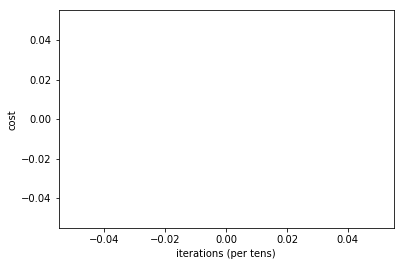

Accuracy for 1 hidden units: 88.49482795017943 %


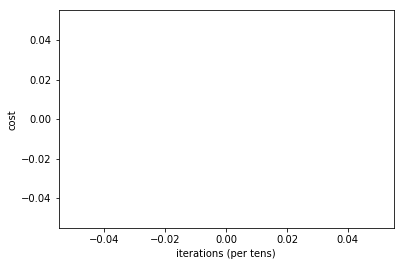

Accuracy for 2 hidden units: 88.2837238758708 %


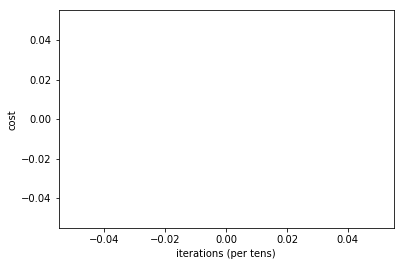

Accuracy for 3 hidden units: 88.83259446907326 %


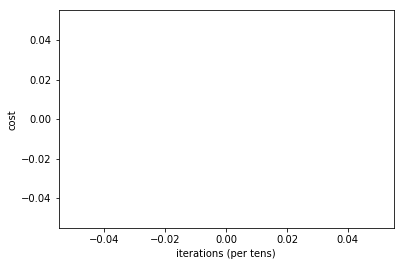

Accuracy for 4 hidden units: 88.38927591302512 %


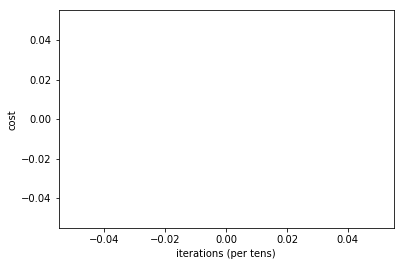

Accuracy for 5 hidden units: 88.66371120962636 %


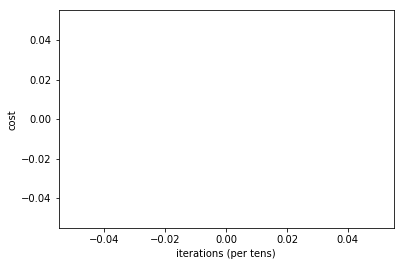

Accuracy for 10 hidden units: 89.25480261769052 %


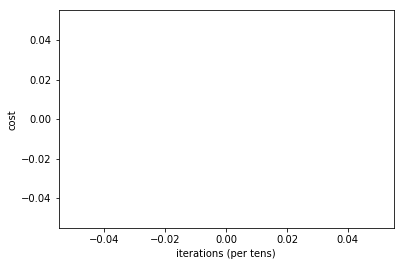

Accuracy for 20 hidden units: 89.19147139539794 %


KeyboardInterrupt: 

In [332]:
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    parameters = nn_model(X_train, Y_train, n_h, num_iterations = 25000)
    predictions = predict(parameters, X_train)
    accuracy = float((np.dot(Y_train,predictions.T) + np.dot(1-Y_train,1-predictions.T))/float(Y_train.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

In [121]:
np.random.seed(3)
n_x = layer_sizes(X_train, Y_train)[0]
n_y = layer_sizes(X_train, Y_train)[2]

print(n_x, n_y)

# Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
parameters = initialize_parameters(n_x, n_h, n_y)
W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]

25 1


In [14]:
print(W1.shape)
print(X_train.shape)
Z1 = np.dot(W1,X_train) + b1
A1 = np.tanh(Z1)
Z2 = np.dot(W2,A1) + b2
A2 = sigmoid(Z2)

NameError: name 'W1' is not defined

In [187]:
print(A2)
print(np.log(A2))
print(W1.shape)
print(X_train.shape)
print(Z1.shape)
print(A1.shape)
print(W2.shape)
print(Z2.shape)
print(A2.shape)
print(Y_train.shape)

[[0.49993772 0.49945183 0.49945394 ... 0.4994564  0.49944603 0.4994541 ]]
[[-0.69327174 -0.69424413 -0.6942399  ... -0.69423497 -0.69425573
  -0.69423958]]
(1, 25)
(25, 4737)
(1, 4737)
(1, 4737)
(1, 1)
(1, 4737)
(1, 4737)
(1, 4737)


In [145]:
c =  np.sum(Y_train)
print(c.shape)
print(Y_train)

(4737,)
        4006  1533  4277  397   3044  4671  4414  4914  2405  1547  ...  3048  \
isGold   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   1.0   

        5031  420   2197  4105  3877  3912  3117  1937  1119  
isGold   1.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0  

[1 rows x 4737 columns]


In [144]:
Y_train

,4006,1533,4277,397,3044,4671,4414,4914,2405,1547,...,3048,5031,420,2197,4105,3877,3912,3117,1937,1119
isGold,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
